In [2]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import re
import csv
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import json
import seaborn as sns
from heapq import nlargest
import operator
from collections import Counter

In [3]:
with open('json/data2021.json') as json_file:
    data_dict21 = json.load(json_file)

with open('json/names2021.json') as json_file:
    names_dict21 = json.load(json_file)
    
with open('json/data2020.json') as json_file:
    data_dict20 = json.load(json_file)

with open('json/data2020_Q2.json') as json_file:
    data_dict20Q2 = json.load(json_file)
    
with open('json/data2020_Q3.json') as json_file:
    data_dict20Q3 = json.load(json_file)
    
with open('json/data2020_Q4.json') as json_file:
    data_dict20Q4 = json.load(json_file)

with open('json/names2020.json') as json_file:
    names_dict20 = json.load(json_file)
    
with open('json/data2019.json') as json_file:
    data_dict19 = json.load(json_file)
                             
with open('json/names2019.json') as json_file:
    names_dict19 = json.load(json_file)
    
with open('json/data2018.json') as json_file:
    data_dict18 = json.load(json_file)
                             
with open('json/names2018.json') as json_file:
    names_dict18 = json.load(json_file)
    
names = [names_dict21, names_dict20, names_dict19, names_dict18]
data = [data_dict21, data_dict20, data_dict19, data_dict18]

In [5]:
def Diction_year(data_dict, diction_name = {}):
    #cik represent for investManager
    for cik in data_dict.keys():
        company_investment = data_dict.get(cik)
        diction_name[cik] = 0
        for company in company_investment.keys():
            diction_name[cik] += company_investment.get(company)
    diction_name

In [6]:
investManager_totalInvestment_2021 = {} 
investManager_totalInvestment_2020Q1 = {}
investManager_totalInvestment_2020Q2 = {}
investManager_totalInvestment_2020Q3 = {}
investManager_totalInvestment_2020Q4 = {}
investManager_totalInvestment_2019 = {}
investManager_totalInvestment_2018 = {}

Diction_year(data_dict21, investManager_totalInvestment_2021)
Diction_year(data_dict20, investManager_totalInvestment_2020Q1)
Diction_year(data_dict20Q2, investManager_totalInvestment_2020Q2)
Diction_year(data_dict20Q3, investManager_totalInvestment_2020Q3)
Diction_year(data_dict20Q4, investManager_totalInvestment_2020Q4)
Diction_year(data_dict19, investManager_totalInvestment_2019)
Diction_year(data_dict18, investManager_totalInvestment_2018)

In [7]:
print(investManager_totalInvestment_2021)

{'0000950123': 1717022376, '0000947484': 11378282, '0001140022': 189279232, '0001567619': 4677828, '0001213900': 3514132, '0001166588': 1421273235, '0001341748': 6707671, '0000948046': 2847426961, '0001779453': 15595274, '0001725547': 13163385, '0000829108': 5005066728, '0000873630': 855884608, '0001580642': 2221487, '0001841616': 15593327, '0000914208': 6879652984, '0000038777': 1409365, '0000895421': 9140418366, '0001628280': 139054532, '0001545545': 2392520, '0001104659': 44516248725, '0001126328': 1734542249, '0001137774': 837923442, '0001606587': 1218307, '0001172036': 2423524, '0001214659': 61038377, '0000930413': 314844319, '0000072971': 6231383971}


In [11]:
df2021 = pd.DataFrame(list(investManager_totalInvestment_2021.items()),columns = ['CIK','2021'])
df2021.head()

,CIK,2021
0,0000950123,1717022376
1,0000947484,11378282
2,0001140022,189279232
3,0001567619,4677828
4,0001213900,3514132


In [12]:
df2020 = pd.DataFrame(list(investManager_totalInvestment_2020Q1.items()),columns = ['CIK','2020Q1'])


In [13]:
df2020Q2 = pd.DataFrame(list(investManager_totalInvestment_2020Q2.items()),columns = ['CIK','2020Q2'])


In [14]:
df2020Q3 = pd.DataFrame(list(investManager_totalInvestment_2020Q3.items()),columns = ['CIK','2020Q3'])


In [15]:
df2020Q4 = pd.DataFrame(list(investManager_totalInvestment_2020Q4.items()),columns = ['CIK','2020Q4'])


In [16]:
df2019 = pd.DataFrame(list(investManager_totalInvestment_2019.items()),columns = ['CIK','2019'])


In [17]:
df2018 = pd.DataFrame(list(investManager_totalInvestment_2018.items()),columns = ['CIK','2018'])


In [18]:
#ignore this, this is a function for concatenate many tables of many years base on CIK, not yet finish
table_list=[df2018,df2019,df2020,df2020Q2,df2020Q3,df2020Q4,df2021]
type(table_list)
def merge_table(table_list):
    #if len(table_list) == 1:
    #    return
    #else:
        result = table_list[0].merge(table_list[1],on='CIK', how='outer').fillna(0)
        i=2
        while i<len(table_list):
            result = result.merge(table_list[i],on='CIK', how='outer').fillna(0)
            i=i+1
        return result

In [19]:
test2 = merge_table(table_list)

In [20]:
df_10_H_Cik = test2.nlargest(10, '2021')

trans = df_10_H_Cik.set_index('CIK').T
trans2 = test2.set_index('CIK').T

In [21]:
trans

CIK,0001104659,0000895421,0000914208,0000072971,0000829108,0000948046,0001126328,0000950123,0001166588,0000873630
2018,1.131255e+07,7.290203e+09,6.824289e+09,0.000000e+00,0.000000e+00,4.640040e+09,1.897987e+09,0.000000e+00,0.000000e+00,1.021706e+09
2019,6.408790e+06,7.063004e+09,6.476831e+09,6.621977e+09,0.000000e+00,4.093745e+09,1.784604e+09,4.163161e+10,6.904705e+08,1.007221e+09
2020Q1,4.344074e+10,8.001987e+09,7.597644e+09,6.280082e+09,0.000000e+00,0.000000e+00,1.794758e+09,9.894689e+08,1.234862e+09,0.000000e+00
2020Q2,4.437395e+10,0.000000e+00,7.569993e+09,0.000000e+00,0.000000e+00,5.236225e+09,1.697525e+09,3.901355e+09,0.000000e+00,7.532940e+08
2020Q3,4.384985e+10,7.670785e+09,0.000000e+00,6.135220e+09,0.000000e+00,2.798118e+09,1.833369e+07,0.000000e+00,1.683116e+09,0.000000e+00
2020Q4,4.408022e+10,8.116626e+09,0.000000e+00,6.206777e+09,0.000000e+00,2.780504e+09,0.000000e+00,3.786104e+09,1.823544e+09,7.506376e+08
2021,4.451625e+10,9.140418e+09,6.879653e+09,6.231384e+09,5.005067e+09,2.847427e+09,1.734542e+09,1.717022e+09,1.421273e+09,8.558846e+08


<AxesSubplot:>

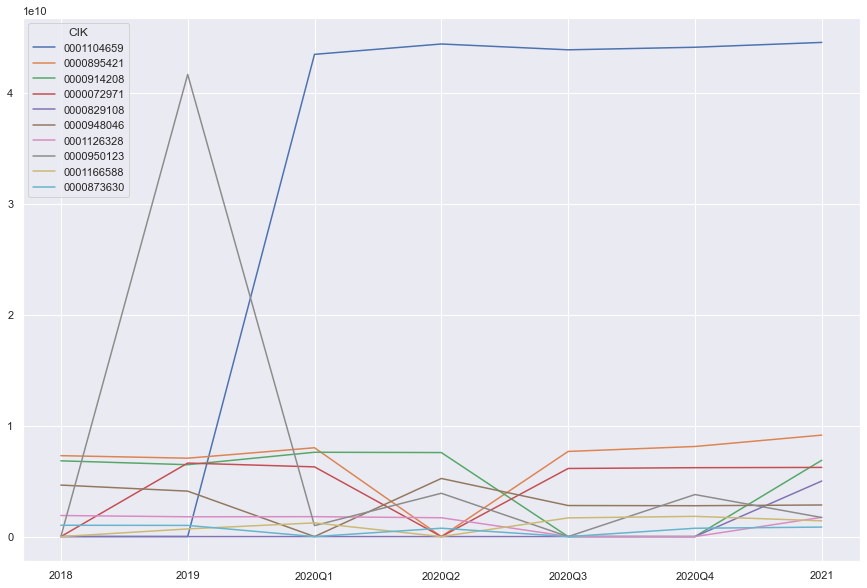

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
trans.plot()

<AxesSubplot:>

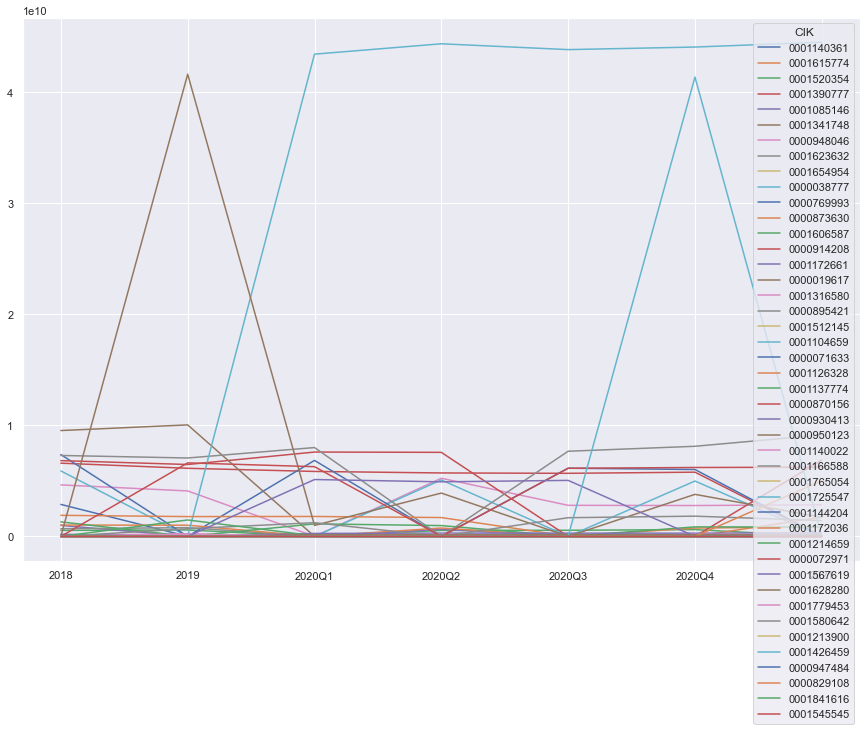

In [23]:
trans2.plot()

In [24]:
sns.set_theme()
sns.set_style("ticks")


Text(13.964856336805553, 0.5, 'total amount of stock per cik')

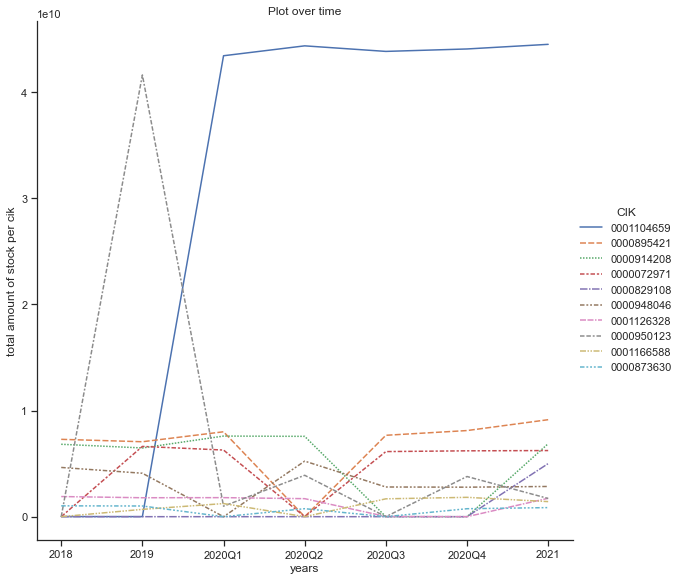

In [25]:
sns.relplot(data = trans, kind="line", height = 8)
plt.title('Plot over time')
# Set x-axis label
plt.xlabel('years')
# Set y-axis label
plt.ylabel('total amount of stock per cik')

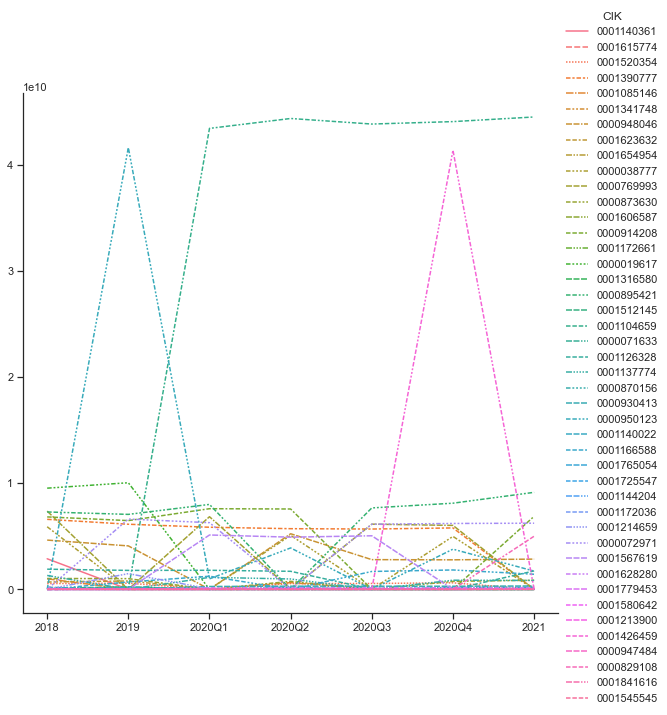

In [26]:
sns.relplot(data = trans2, kind="line", height = 8)